In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Part 1: Handling missing value

In [4]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: >

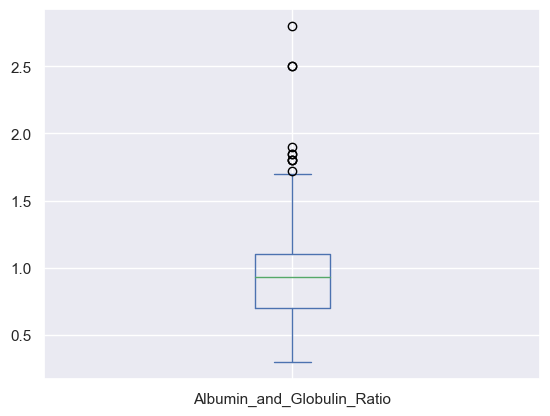

In [6]:
dataset['Albumin_and_Globulin_Ratio'].plot(kind='box')

In [8]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [9]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Part 2: Encoding

In [10]:
dataset['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [12]:
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
dataset['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int8   
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), int8(1)
memory usage: 46.2 KB


## Part 3: Handling outliers

### We will not remove outliers as this is clinical data and removing outliers deletes data

## Part 4: Feature scaling

Note:Feature scaling is only for independent variable.
Split the data into into dependent and independent variable

In [19]:
from sklearn.preprocessing import StandardScaler

x = dataset.iloc[:,:-1]
print(x.columns)
y = dataset['Dataset']
print(y)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


In [20]:
sc = StandardScaler()
sc_x = sc.fit_transform(X=x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147529
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650323
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178953
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166718
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.718760
...,...,...,...,...,...,...,...,...,...,...
578,0.942997,0.567446,-0.451114,-0.493964,0.862786,-0.332743,-0.262967,-0.537740,-1.939837,-1.813034
579,-0.293407,0.567446,-0.434996,-0.493964,-0.793378,-0.250535,-0.273359,-0.445534,0.073157,0.480964
580,0.448435,0.567446,-0.402760,-0.458327,-0.187766,-0.179288,-0.211005,-0.076707,0.073157,0.166718
581,-0.849789,0.567446,-0.322169,-0.351417,-0.439074,-0.283418,-0.269895,0.292120,0.324781,0.166718


## Part 5: Imbalance treatment

In [21]:
y.value_counts()
#The data is imbalanced. Pass both x and y for treatment

1    416
2    167
Name: Dataset, dtype: int64

In [29]:
import imblearn 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(X=sc_x, y=y)
print(x_sam.shape, y_sam.shape, y.shape)

(832, 10) (832,) (583,)


In [30]:
y_sam.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

## Part 6: Checking correlation

### Multicollinearity not required to be tested in KNN

In [31]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

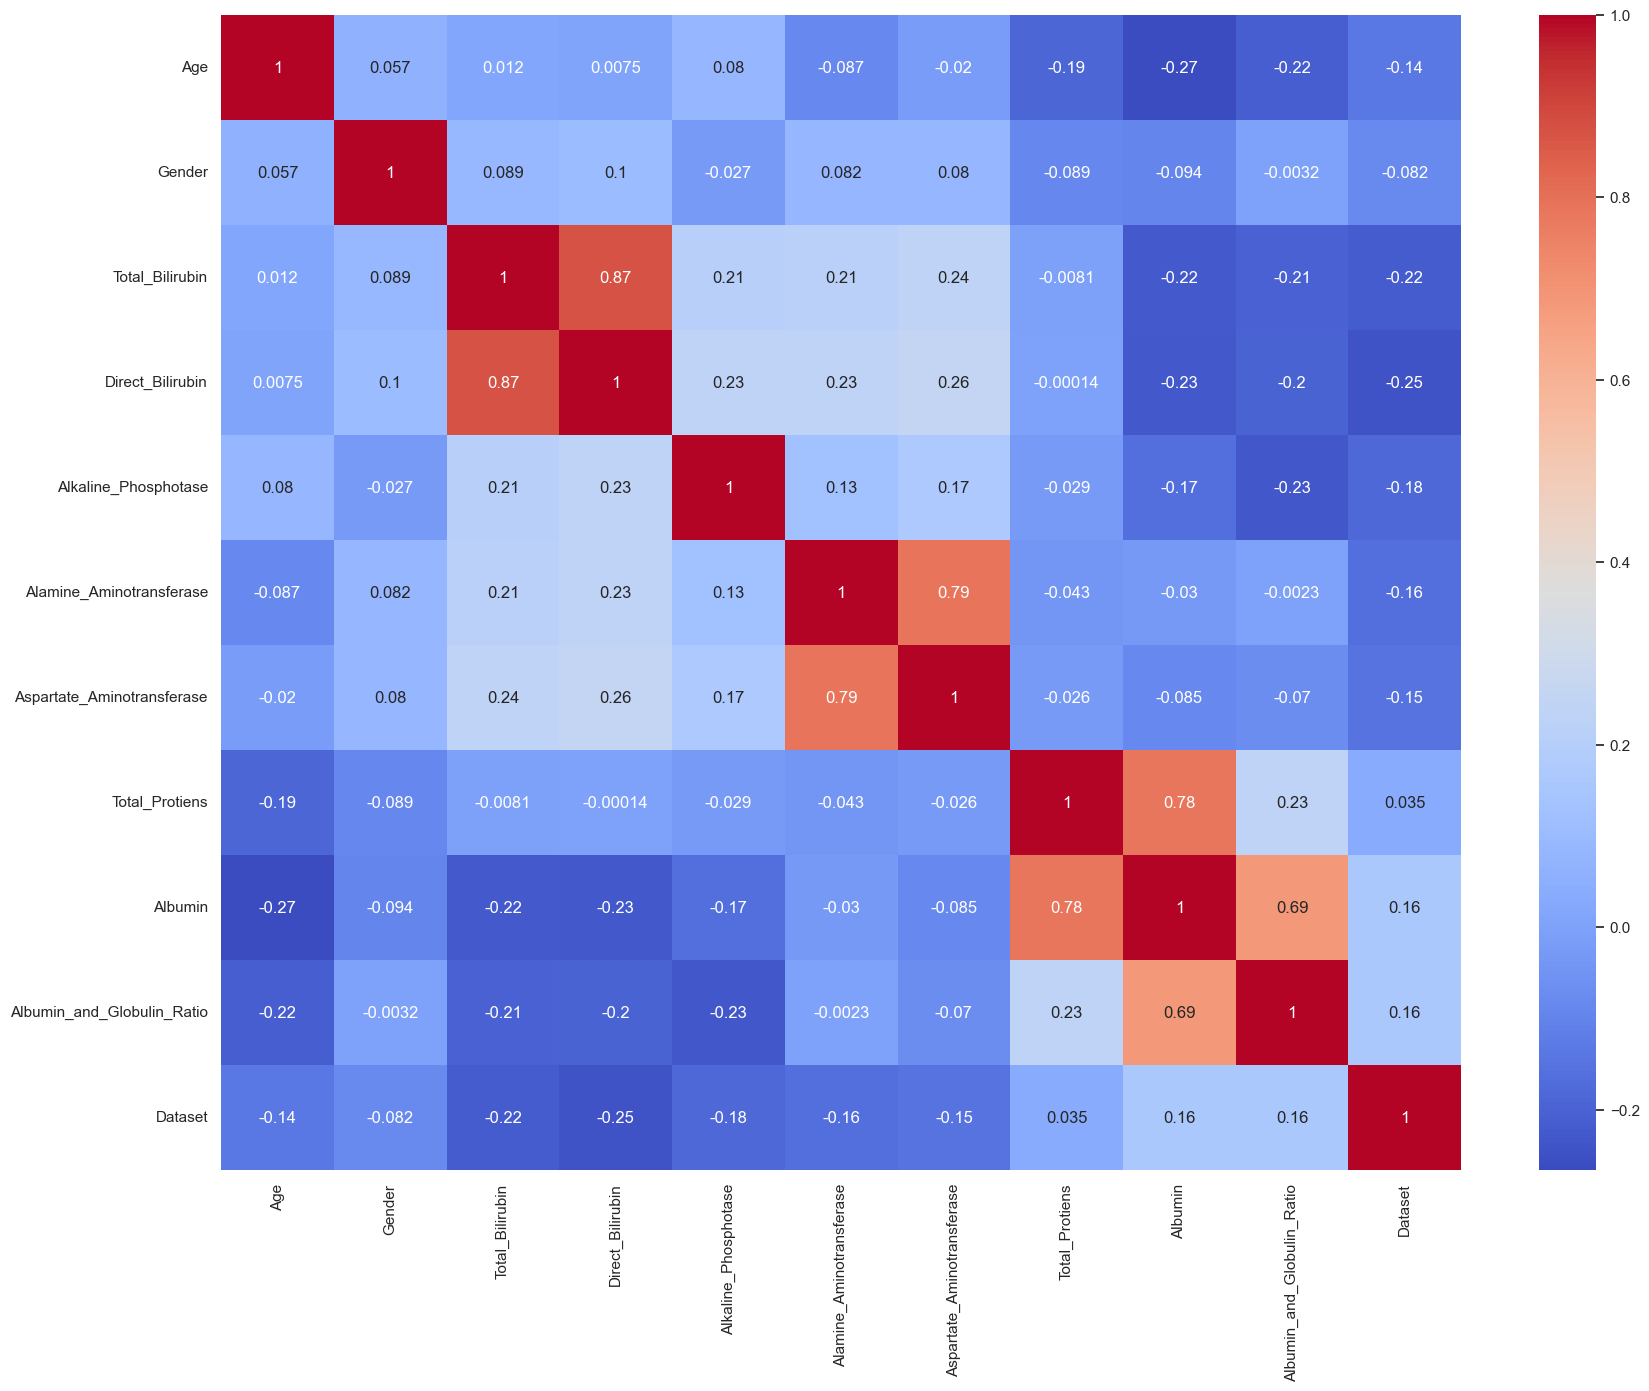

In [27]:
plt.figure(figsize=(20,15))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#Correlation exists between columns Albumin and Albumin_and_Globulin_Ratio

## Part 7: Model building and validation

Accepted variance less than 10
training and test accuracy > 70

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, stratify=y_sam, test_size=0.25, random_state=109)

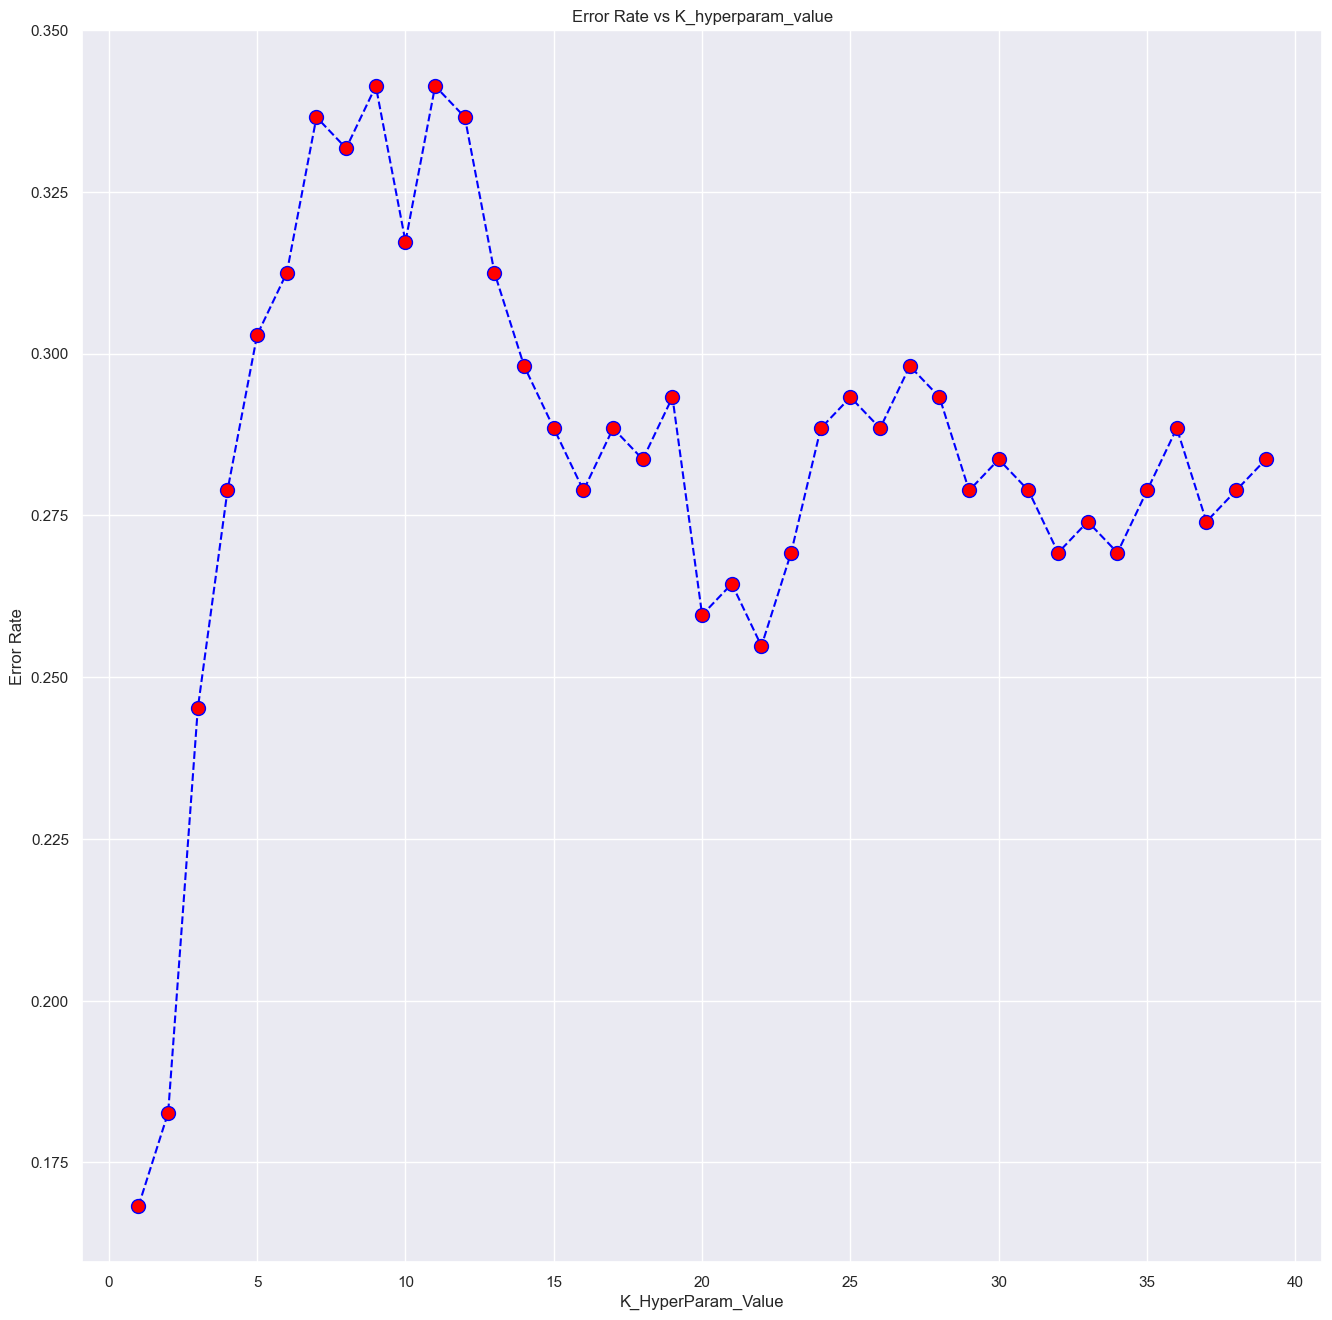

In [35]:
#Choosing best k-value (Hyperparameter Tuning)

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

In [36]:
# Basis analysis, error_rate would be less when we choose k=3 (Always odd number and not 1 OR 2 )
 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

In [38]:
# Model validation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[245  67]
 [ 17 295]]

[[68 36]
 [15 89]]


In [39]:
# classification_report 

print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.94      0.79      0.85       312
           2       0.81      0.95      0.88       312

    accuracy                           0.87       624
   macro avg       0.88      0.87      0.86       624
weighted avg       0.88      0.87      0.86       624


              precision    recall  f1-score   support

           1       0.82      0.65      0.73       104
           2       0.71      0.86      0.78       104

    accuracy                           0.75       208
   macro avg       0.77      0.75      0.75       208
weighted avg       0.77      0.75      0.75       208



In [41]:
# Accuracy score

print("Training accuracy")
print(accuracy_score(y_train, y_pred_train))
print("Test accuracy")
print(accuracy_score(y_test, y_pred_test))

Training accuracy
0.8653846153846154
Test accuracy
0.7548076923076923
